These codes recreate Example 10.2 of Hastie et al.'s book, The Element of Statistical Learning.  They were based on the sklearn website:

http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_hastie_10_2.html

### - packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

%matplotlib inline

### - load simulated data

In [2]:
X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)

X_test, y_test = X[2000:], y[2000:]
X_train, y_train = X[:2000], y[:2000]

## 1. Create stump, decision trees, and boosted stumps/trees

### - set parameters

In [3]:
n_estimators = 400
learning_rate = 1.

### - stump

In [4]:
dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(X_train, y_train)
dt_stump_err = 1.0 - dt_stump.score(X_test, y_test)
dt_stump_err

0.45930000000000004

### - single decision tree (max_depth=9)

In [5]:
dt9 = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1)
dt9.fit(X_train, y_train)
dt9_err = 1.0 - dt9.score(X_test, y_test)
dt9_err

0.3133

### - boosted stump

In [6]:
ada_stump = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME.R")
ada_stump.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=400, random_state=None)

### - max_depth=2 decision tree

In [7]:
dt2 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1)
dt2.fit(X_train, y_train)
dt2_err = 1.0 - dt2.score(X_test, y_test)

### - boosted max_depth=2 decision tree

In [8]:
ada_2 = AdaBoostClassifier(
    base_estimator=dt2,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME.R")
ada_2.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=400, random_state=None)

### - max_depth=3 decision tree

In [9]:
dt3 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1)
dt3.fit(X_train, y_train)
dt3_err = 1.0 - dt3.score(X_test, y_test)

### - boosted max_depth=3 decision tree

In [10]:
ada_3 = AdaBoostClassifier(
    base_estimator=dt3,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME.R")
ada_3.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=400, random_state=None)

## 2. Train and test errors

### - test errors

In [11]:
ada_stump_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_stump.staged_predict(X_test)):
    ada_stump_err[i] = zero_one_loss(y_pred, y_test)

ada_2_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_2.staged_predict(X_test)):
    ada_2_err[i] = zero_one_loss(y_pred, y_test)
    
ada_3_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_3.staged_predict(X_test)):
    ada_3_err[i] = zero_one_loss(y_pred, y_test)

### - train errors

In [12]:
ada_stump_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_stump.staged_predict(X_train)):
    ada_stump_err_train[i] = zero_one_loss(y_pred, y_train)
    
ada_2_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_2.staged_predict(X_train)):
    ada_2_err_train[i] = zero_one_loss(y_pred, y_train)  
    
ada_3_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_3.staged_predict(X_train)):
    ada_3_err_train[i] = zero_one_loss(y_pred, y_train)    

## 3. Plots

### a. Stump and boosted stump

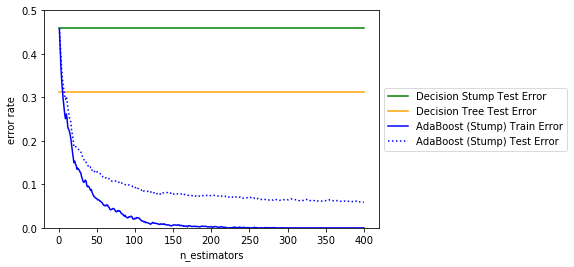

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([1, n_estimators], [dt_stump_err] * 2, 'k-',
        label='Decision Stump Test Error',
        color='green')
ax.plot([1, n_estimators], [dt9_err] * 2, 'k-',
        label='Decision Tree Test Error',
        color='orange')

ax.plot(np.arange(n_estimators) + 1, ada_stump_err_train,
        label='AdaBoost (Stump) Train Error',
        color='blue')

ax.plot(np.arange(n_estimators) + 1, ada_stump_err,
        label='AdaBoost (Stump) Test Error',
        color='blue',
        linestyle = ':')

ax.set_ylim((0.0, 0.5))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True)

leg.get_frame().set_alpha(0.7)

plt.show()

### - check if test error is continuing to decrease 

In [16]:
n_estimators2 = 1000

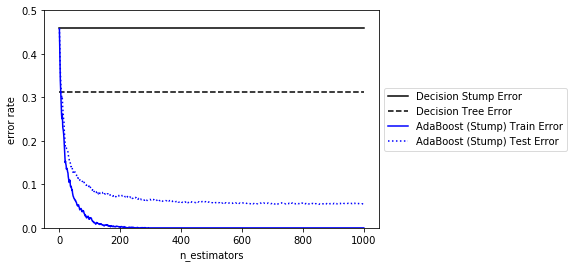

In [21]:
#boosted stump
ada_stump2 = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators2,
    algorithm="SAMME.R")
ada_stump2.fit(X_train, y_train)

ada_stump_err2 = np.zeros((n_estimators2,))
for i, y_pred in enumerate(ada_stump2.staged_predict(X_test)):
    ada_stump_err2[i] = zero_one_loss(y_pred, y_test)

ada_stump_err_train2 = np.zeros((n_estimators2,))
for i, y_pred in enumerate(ada_stump2.staged_predict(X_train)):
    ada_stump_err_train2[i] = zero_one_loss(y_pred, y_train)
    
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([1, n_estimators2], [dt_stump_err] * 2, 'k-',
        label='Decision Stump Error')
ax.plot([1, n_estimators2], [dt9_err] * 2, 'k--',
        label='Decision Tree Error')

ax.plot(np.arange(n_estimators2) + 1, ada_stump_err_train2,
        label='AdaBoost (Stump) Train Error',
        color='blue')

ax.plot(np.arange(n_estimators2) + 1, ada_stump_err2,
        label='AdaBoost (Stump) Test Error',
        color='blue',
        linestyle = ':')

ax.set_ylim((0.0, 0.5))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True)

leg.get_frame().set_alpha(0.7)

plt.show()   

In [18]:
print("Test error at 400:", round(ada_stump_err2[399],3))
print("Test error at 1000:", round(ada_stump_err2[999],3))

Test error at 400: 0.06
Test error at 1000: 0.055


### b. Boosted stumps and max_depth=2 decision tree

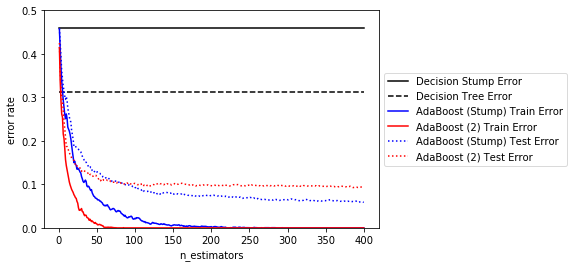

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([1, n_estimators], [dt_stump_err] * 2, 'k-',
        label='Decision Stump Error')
ax.plot([1, n_estimators], [dt9_err] * 2, 'k--',
        label='Decision Tree Error')

ax.plot(np.arange(n_estimators) + 1, ada_stump_err_train,
        label='AdaBoost (Stump) Train Error',
        color='blue')
ax.plot(np.arange(n_estimators) + 1, ada_2_err_train,
        label='AdaBoost (2) Train Error',
        color='red')

ax.plot(np.arange(n_estimators) + 1, ada_stump_err,
        label='AdaBoost (Stump) Test Error',
        color='blue',
        linestyle = ':')
ax.plot(np.arange(n_estimators) + 1, ada_2_err,
        label='AdaBoost (2) Test Error',
        color='red',
        linestyle = ':')

ax.set_ylim((0.0, 0.5))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True)

leg.get_frame().set_alpha(0.7)

plt.show()

### b. Boosted stumps and max_depth=3 decision tree

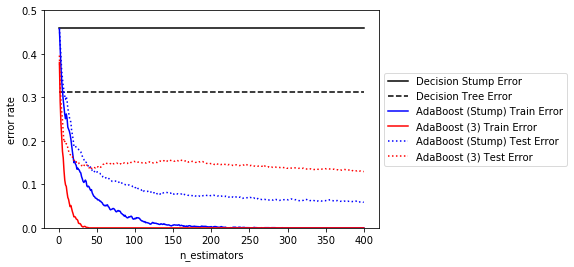

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([1, n_estimators], [dt_stump_err] * 2, 'k-',
        label='Decision Stump Error')
ax.plot([1, n_estimators], [dt9_err] * 2, 'k--',
        label='Decision Tree Error')

ax.plot(np.arange(n_estimators) + 1, ada_stump_err_train,
        label='AdaBoost (Stump) Train Error',
        color='blue')
ax.plot(np.arange(n_estimators) + 1, ada_3_err_train,
        label='AdaBoost (3) Train Error',
        color='red')

ax.plot(np.arange(n_estimators) + 1, ada_stump_err,
        label='AdaBoost (Stump) Test Error',
        color='blue',
        linestyle = ':')
ax.plot(np.arange(n_estimators) + 1, ada_3_err,
        label='AdaBoost (3) Test Error',
        color='red',
        linestyle = ':')

ax.set_ylim((0.0, 0.5))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True)

leg.get_frame().set_alpha(0.7)

plt.show()